In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

import astropy.io.fits as fits

Text(0.5,0,'$\\theta$')

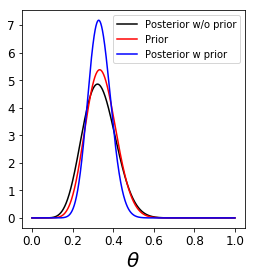

In [4]:
# posteior distribution of binomial data

n0 = 39
y0 = 13

n = 31
y = 10

theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,y+1,n-y+1)
p2 = stats.beta.pdf(theta,y0+1,n0-y0+1)
p3 = stats.beta.pdf(theta,y+y0+1,n+n0-y0-y+1)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
e1, = ax.plot(theta,p,'k-')
e2, = ax.plot(theta,p2,'r-')
e3, = ax.plot(theta,p3,'b-')
plt.legend([e1,e2,e3],['Posterior w/o prior','Prior','Posterior w prior'])
ax.set_xlabel(r'$\theta$',fontsize=20)

In [5]:
def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl

N_star=28, N_gal=22

First 50 sources: E(theta|y)=0.56
N_star=33, N_gal=17

Second 50 sources: E(theta|y)=0.65
Second 50 sources with the prior from the first 50: E(theta|y)=0.61


Text(0.5,0,'$\\theta$')

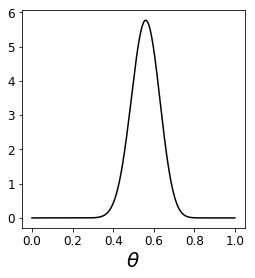

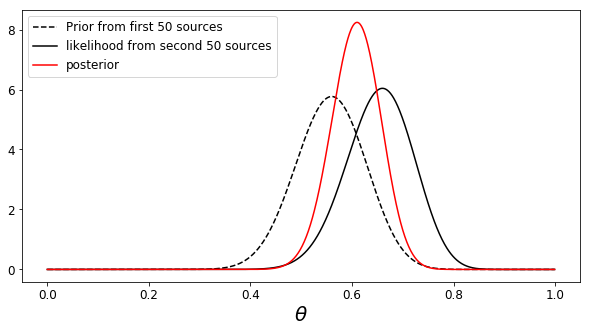

In [6]:
# star/galaxy ratio in a small field of sky

filename = 'sdss_field.fits'   #一个星表
sdss = loadData(filename)

# the first 50 data
types = sdss.type[0:50]   #前50个源
Nstar = np.sum(types==3)   # type==3是表示该源为恒星；type==6是表示该源为星系
N = 50
print('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)})
E_th_y = (Nstar+1.)/(N+2.)   #后验分布期望（P52）
print (r'First 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})

# with uniform distribution
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,Nstar+1,N-Nstar+1)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)

# with conjugate prior determined by the first 50 and use the 51:100 data
alpha = Nstar+1    #根据前50个源得到的超参数α
beta = N-Nstar+1   #根据前50个源得到的超参数β

types = sdss.type[50:100]   #第51到100个源
Nstar2 = np.sum(types==3)
N2 = 50
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+1.)/(N2+2.)   #无信息的先验分布情况下的后验分布期望值（P52）
print(r'Second 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})

# uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)

# conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)
print (r'Second 50 sources with the prior from the first 50: E(theta|y)=%(n).2f' %\
       {'n': (Nstar2+alpha)/np.float(N2+alpha+beta)})   #有信息的先验分布情况下后验分布期望值（P53）

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(theta,p,'k--')   #前50个源给出的概率分布（先验分布）
e2, = ax.plot(theta,p2_0,'k-')   #后50个源的数据（无先验的后验分布 也可看做似然）
e3, = ax.plot(theta,p2,'r-')   #后验分布
plt.legend([e1,e2,e3],['Prior from first 50 sources','likelihood from second 50 sources', 'posterior'],fontsize=12)
ax.set_xlabel(r'$\theta$',fontsize=20)

N_star=363, N_gal=187

550 sources with conjugate prior: E(theta|y)=0.6512
550 sources: theta=0.6600


Text(0.5,0,'$\\theta$')

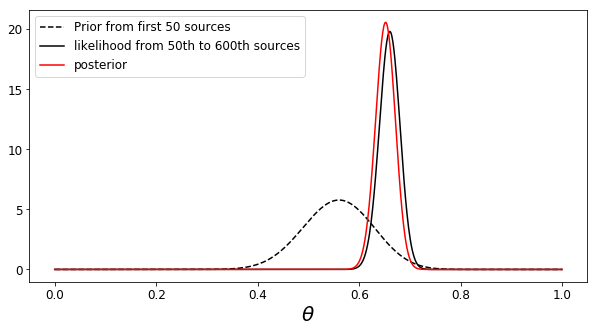

In [7]:
# when data increases prior play less role
alpha = Nstar+1   #仍然以前50个源作为先验
beta = N-Nstar+1

types = sdss.type[50:600]   #第51到600个源
Nstar2 = np.sum(types==3)
N2 = 550
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+alpha)/np.float(N2+alpha+beta)   #后验均值
print ('550 sources with conjugate prior: E(theta|y)=%(d1).4f' % {'d1':E_th_y})
print ( '550 sources: theta=%(d1).4f' % {'d1':Nstar2/550.})   #不看先验时得到的值



# uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)

# conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(theta,p,'k--')
e2, = ax.plot(theta,p2_0,'k-')
e3, = ax.plot(theta,p2,'r-')
plt.legend([e1,e2,e3],['Prior from first 50 sources','likelihood from 50th to 600th sources', 'posterior'],fontsize=12)
ax.set_xlabel(r'$\theta$',fontsize=20)

### 结论：观测数据量大时，后验分布不太依赖先验分布。